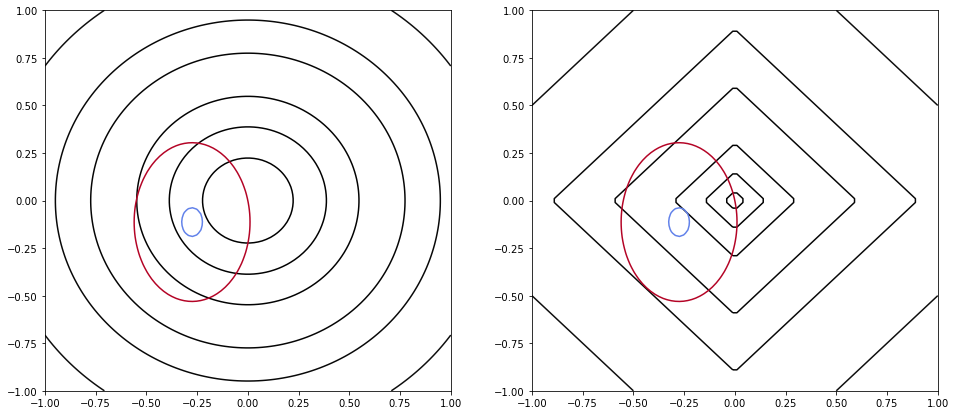

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA


def costfunction(X, y, w):
    h = X @ w
    J = (h - y).T @ (h - y)
    return J

X = np.array([
    [1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0.697, 0.460],
    [2, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0.774, 0.376],
    [3, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0.666, 0.091],
    [4, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0.245, 0.057], ])
y = np.array([1, 1, 0, 0])
y = y - y.mean()
X = PCA(n_components=2).fit_transform(X)
#X = X / np.linalg.norm(X, axis=0)

xx, yy = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))

# Computing the cost function for each theta combination
zz_l2 = np.array([xi**2 + yi**2 for xi, yi in zip(np.ravel(xx), np.ravel(yy))])  # L2 function
zz_l1 = np.array([np.abs(xi) + np.abs(yi) for xi, yi in zip(np.ravel(xx), np.ravel(yy))])  # L1 function
zz_ls = np.array([costfunction(X, y.reshape(-1, 1), np.array([t0, t1]).reshape(-1, 1))
                  for t0, t1 in zip(np.ravel(xx), np.ravel(yy))])  # least square cost function

# Reshaping the cost values
Z_l2 = zz_l2.reshape(xx.shape)
Z_ls = zz_ls.reshape(xx.shape)
Z_l1 = zz_l1.reshape(xx.shape)

fig = plt.figure(figsize=(16, 7))

# Plotting the contours - L2
ax = fig.add_subplot(1, 2, 1)
ax.contour(xx, yy, Z_l2, levels=[.05, .15, .3, .6, .9, 1.5, 3, 6, 10, 15, 25],  cmap='gist_gray')
ax.contour(xx, yy, Z_ls, levels=[.002, .005, .008, .01, .04, .07, .10, .13, 1], cmap='coolwarm')

# Plotting the contours - L1
ax = fig.add_subplot(1, 2, 2)
ax.contour(xx, yy, Z_l1, levels=[.05, .15, .3, .6, .9, 1.5, 3, 6, 10, 15, 25],  cmap='gist_gray')
ax.contour(xx, yy, Z_ls, levels=[.002, .005, .008, .01, .04, .07, .10, .13, 1], cmap='coolwarm')

plt.show()
